# 导入数据

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.cluster import DBSCAN
import seaborn as sns
import numpy as np

ModuleNotFoundError: No module named 'seaborn'

In [4]:
data = pd.read_csv(r"C:\Users\钟冠霆\Desktop\OC-16.csv",usecols=['ra','dec','parallax','pmra','pmdec','phot_bp_mean_mag','bp_rp','source_id'])

In [5]:
data.shape

(557722, 8)

In [6]:
data.head()

,source_id,ra,dec,parallax,pmra,pmdec,phot_bp_mean_mag,bp_rp
0,1971837700570324736,318.381536,45.366636,NaN,NaN,NaN,NaN,NaN
1,1971858831805347072,318.675730,45.387925,NaN,NaN,NaN,NaN,NaN
2,1971836979007575168,318.342057,45.295605,NaN,NaN,NaN,21.633472,1.618425
3,1971846462299499776,318.783968,45.363040,NaN,NaN,NaN,21.582285,1.604853
4,1971846462299500928,318.781235,45.363601,NaN,NaN,NaN,21.316810,1.109205


# 数据处理

## 去除空数据

In [7]:
data = data.dropna()

In [8]:
data.shape

(468998, 8)

In [9]:
data.head()

,source_id,ra,dec,parallax,pmra,pmdec,phot_bp_mean_mag,bp_rp
27,1971836287512306944,318.482671,45.294945,0.222769,-3.020675,-5.508899,19.466425,2.195366
28,1971836287512329344,318.480802,45.298460,0.362592,-2.357610,-4.081278,20.179379,1.889694
30,1971836291810614656,318.481538,45.299609,0.046456,-0.971655,-2.229048,20.520113,1.762997
31,1971836291812618880,318.477225,45.294791,2.408905,-5.291662,-6.809260,20.933533,1.488503
32,1971836291812622720,318.480737,45.300456,0.634612,-0.888925,-3.259455,21.735851,2.284634


In [10]:
data.to_csv(r"C:\Users\钟冠霆\Desktop\数据预处理\data.csv")


In [3]:
data = pd.read_csv(r"C:\Users\钟冠霆\Desktop\数据预处理\data.csv",usecols=['ra','dec','parallax','pmra','pmdec','phot_bp_mean_mag','bp_rp','source_id'])

## 标准化

In [4]:
x = data[['ra','dec','parallax','pmra','pmdec']]

In [5]:
transfer = StandardScaler()

In [9]:
x = transfer.fit_transform(x)
x.shape

(468998, 5)

In [10]:
x[:110000].shape

(110000, 5)

## 调用KD树算法搜索K-近邻距离

In [48]:
from sklearn.neighbors import NearestNeighbors
# 函数功能：对数据集x的前1000个数据做10近邻搜索；
# 搜索范围：数据集x内全体数据；
def knn_search(X):
    # 查询点y:x内前一千个数；
    Y = X
    # 查询范围：x内全体数据；查询11近邻；
    nbs = NearestNeighbors(n_neighbors=13, algorithm='ball_tree').fit(X)
    # distances：最近邻距离；indices：最近邻索引号；
    distances, indices = nbs.kneighbors(Y)
    # knn近邻搜索范围包含自己，返回结果去除自己（即去除查询结果第一列），得到查询点的十近邻；
    return distances[:, -1]

In [49]:
k_dist = sorted(knn_search(x[:110000]))
k_dist[:801]

[0.10228208966319048,
 0.1035607726908964,
 0.10370357327396211,
 0.10386920937846963,
 0.10544335168361936,
 0.10682479287792046,
 0.10811317832328347,
 0.10872182960151255,
 0.1090974373499964,
 0.10945536816839573,
 0.11002503817584174,
 0.11026502001538938,
 0.11061370411487349,
 0.11064891025440318,
 0.11070885801402468,
 0.1109177863352988,
 0.11096968251506599,
 0.11140031863913392,
 0.11146100244814297,
 0.11154448362074852,
 0.11197102006379321,
 0.11264712058363217,
 0.11286067218506668,
 0.11354624321349976,
 0.11383360920725322,
 0.11440859258231151,
 0.1145626294491261,
 0.11472576431924064,
 0.11473415527495306,
 0.11484270055346546,
 0.11493803131417249,
 0.11494009266386954,
 0.11503304872688216,
 0.11518660705618075,
 0.11529699931764888,
 0.11550511451338963,
 0.11557403088735083,
 0.11580668910195638,
 0.1158333980967369,
 0.11598558639930147,
 0.11598596841885365,
 0.11600530246108483,
 0.11602450788042971,
 0.1162037625772632,
 0.11628243906113069,
 0.1163401136367

## 绘制K-dist图

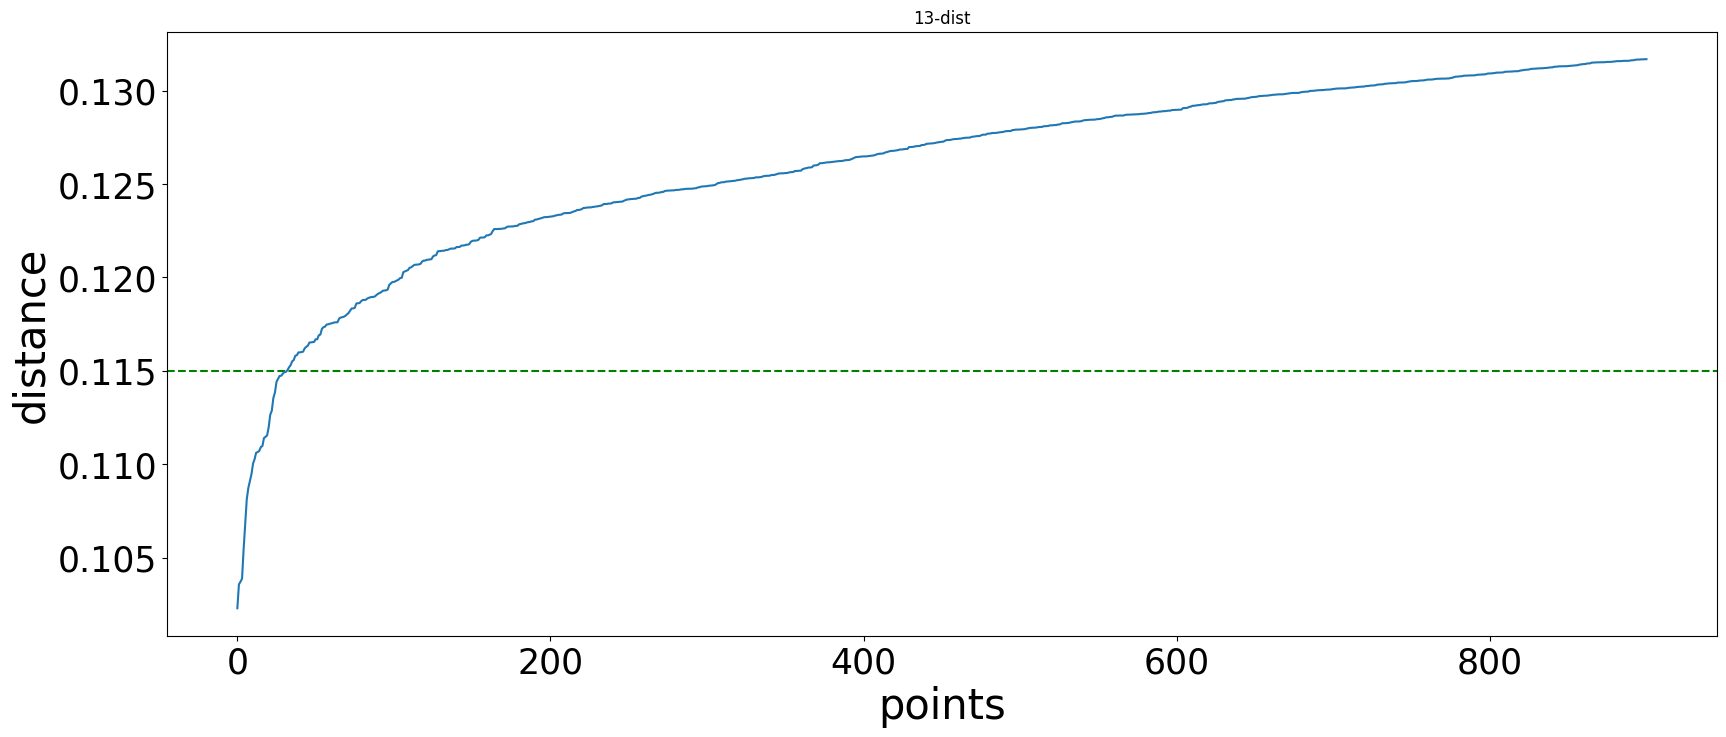

In [54]:
plt.xlabel("points", fontsize=30)
plt.ylabel("distance", fontsize=30)
plt.xticks(fontsize=25)  #fontsize设置x轴和y轴标度的大小
plt.yticks(fontsize=25)
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['figure.dpi'] = 100
plt.axhline(y = 0.1150,ls="--",c="green")#添加水平直线
plt.title('13-dist')
plt.plot(k_dist[:901])
plt.savefig(r"C:\Users\钟冠霆\Desktop\result\border.jpg")
plt.show()

# 确定DBSCAN参数 eps=0.1035 -- min_samples=7

## 使用DBSCAN算法进行可视化

In [59]:
y_pred = DBSCAN(eps=0.1150,min_samples=14).fit_predict(x)

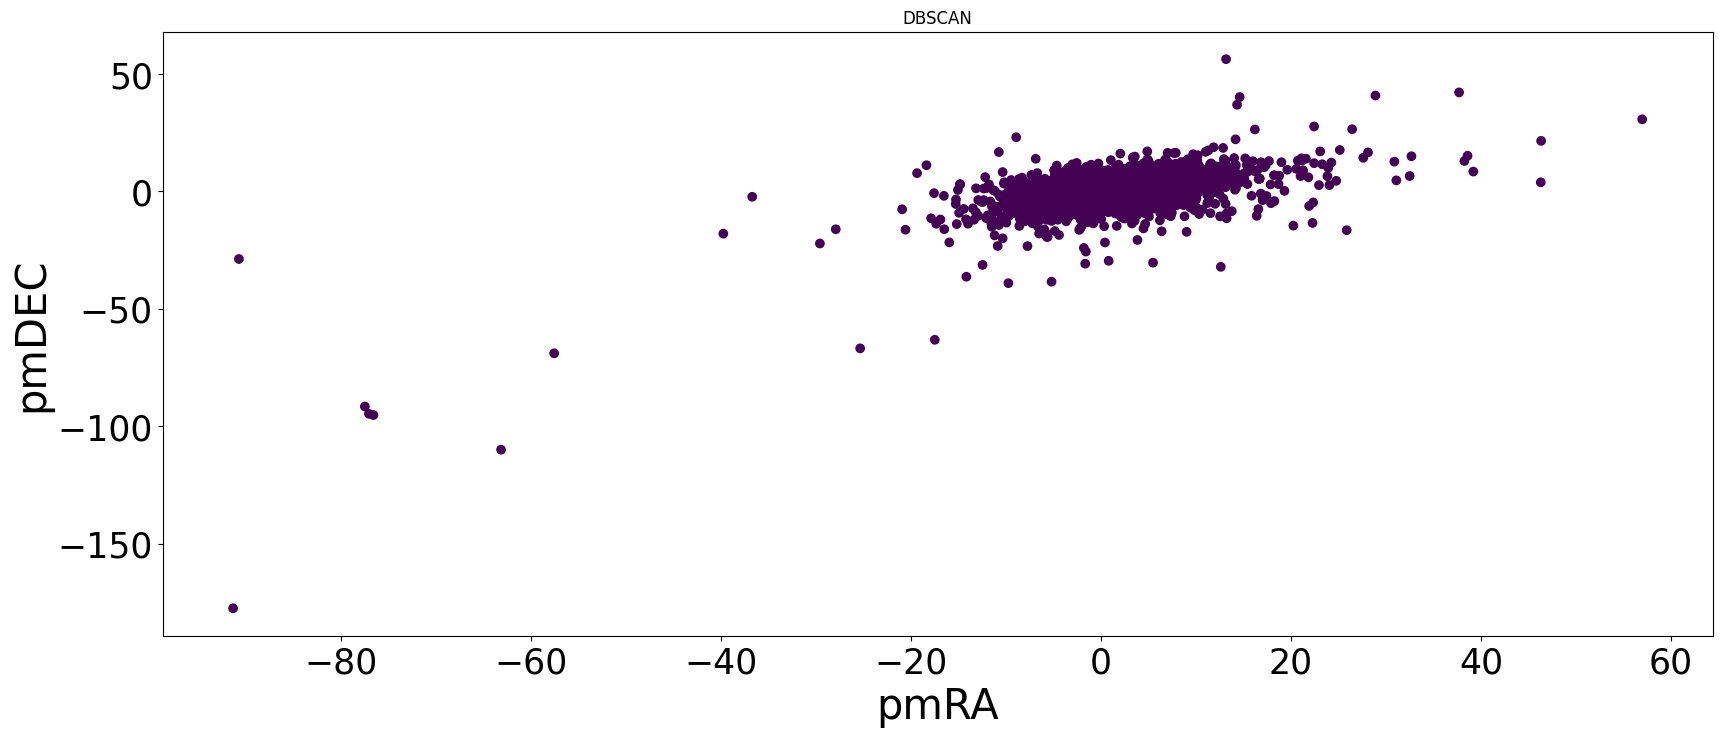

In [61]:
plt.xticks(fontsize=25)  #fontsize设置x轴和y轴标度的大小
plt.yticks(fontsize=25)
plt.xlabel("pmRA", fontsize=30)
plt.ylabel("pmDEC", fontsize=30)
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['figure.dpi'] = 100
plt.scatter(x=x[:, -2], y=x[:, -1], c=y_pred,marker='o')
plt.title('DBSCAN')
plt.savefig(r"C:\Users\钟冠霆\Desktop\result\pmRA_pmDEC.jpg")
plt.show()

In [117]:
max((x[:, -2]))

113.75338416774751

In [92]:
x

array([[-0.19023886, -1.95390213,  1.2656411 , -0.75124649, -0.05792841],
       [-0.10440348, -1.87938057, -0.15513311, -0.16283258,  0.26898531],
       [-0.32265292, -1.79468498,  0.17495338, -0.37166375,  0.39209927],
       ...,
       [-0.24442358,  2.02092692,  1.25322972,  0.04219623, -0.09459123],
       [-0.23678261,  2.02625179, -1.32672851, -0.509372  ,  0.5043418 ],
       [-0.27833954,  2.01901994, -0.01075458, -0.39891764,  0.24489471]])

In [124]:
max(x[:, -1])

16.748572986300424

In [103]:
x[:,2]

array([ 1.2656411 , -0.15513311,  0.17495338, ...,  1.25322972,
       -1.32672851, -0.01075458])

## 绘制直方图

No handles with labels found to put in legend.


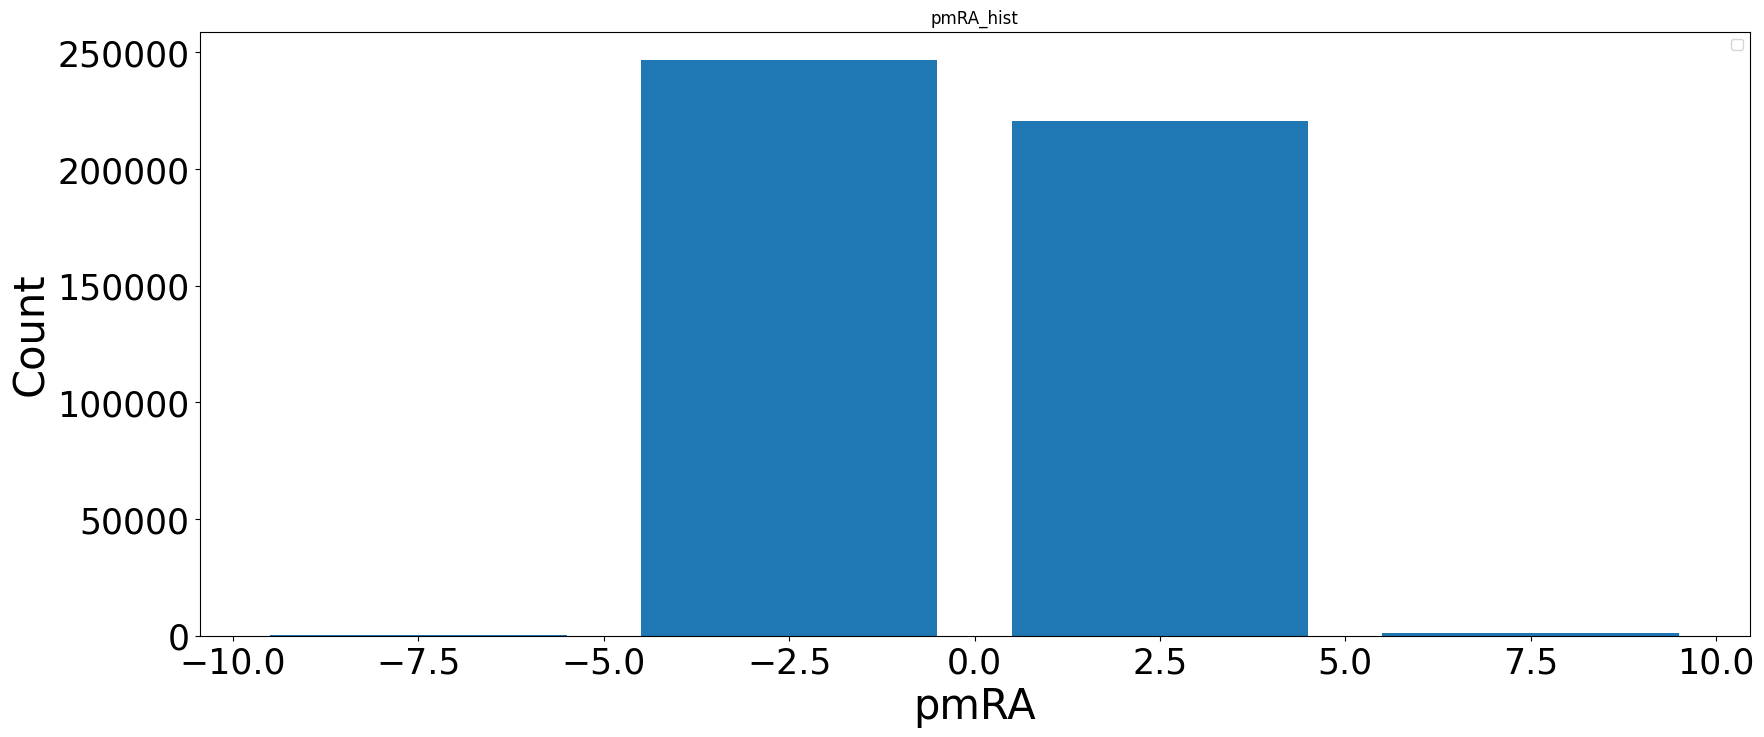

In [63]:
salary = x[:, -2]
group = [-10,-5,0,5,10]
plt.xticks(fontsize=25)  #fontsize设置x轴和y轴标度的大小
plt.yticks(fontsize=25)
plt.hist(salary, group, histtype='bar', rwidth=0.8)
plt.legend()
plt.xlabel("pmRA", fontsize=30)
plt.ylabel("Count", fontsize=30)
plt.title('pmRA_hist')
plt.savefig(r"C:\Users\钟冠霆\Desktop\result\pmRA_hist.jpg")
plt.show()